In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline


### Normal ECG Data

In [2]:
ecg_normal = pd.read_csv('../data/ecg_normal.csv', header=None, names=['ecg'])

In [3]:
ecg_normal

,ecg
0,43.939
1,45.125
2,46.266
3,47.352
4,48.374
...,...
15339,22.896
15340,23.394
15341,23.951
15342,24.568


In [4]:
ecg_normal.dtypes

ecg    float64
dtype: object

In [5]:
ecg_normal.isnull().sum()

ecg    0
dtype: int64

In [6]:
# plot function
def plot(data, figsize, title):
    plt.figure(figsize=figsize);
    plt.plot(data['ecg'].values);
    plt.title(title, fontsize=18);
    plt.xlim(0, data.shape[0]);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);

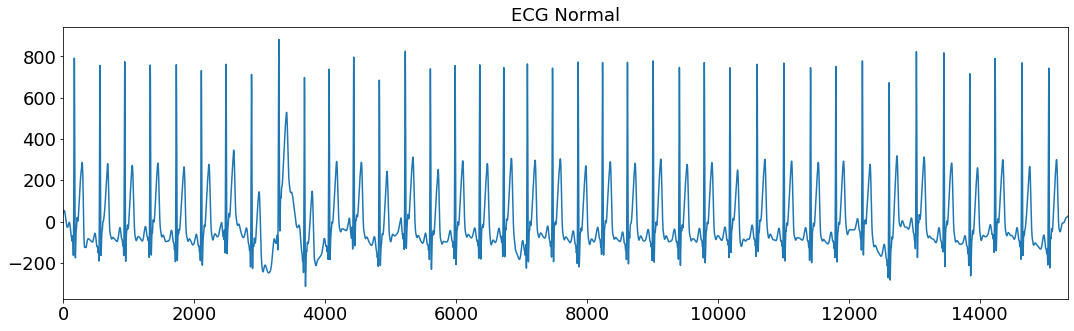

In [7]:
plot(ecg_normal, (18, 5), 'ECG Normal')

### Abnormal ECG Data

In [8]:
ecg_abnormal = pd.read_csv('../data/ecg_abnormal.csv', header=None, names=['ecg'])

In [9]:
ecg_abnormal

,ecg
0,-17.660
1,-16.239
2,-14.881
3,-13.586
4,-12.351
...,...
15339,-57.464
15340,-55.500
15341,-53.504
15342,-51.481


In [10]:
ecg_abnormal.dtypes

ecg    float64
dtype: object

In [11]:
ecg_abnormal.isnull().sum()

ecg    0
dtype: int64

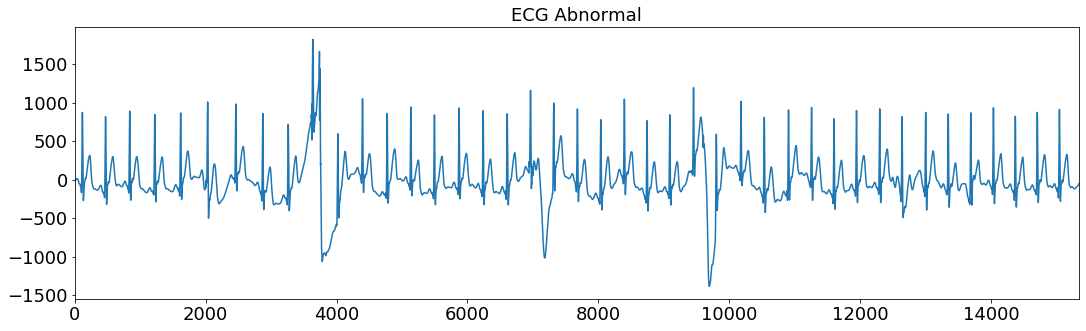

In [12]:
plot(ecg_abnormal, (18, 5), 'ECG Abnormal')

From the graphs above, ecg_normal is regular at an interval from 6000 to 12000. This will be used for the training. The abnormal data has some irregular intervals. The testing data will be at an interval from 8000 to 14000 so that the data will contain the regular pattern and irregular patterns.

### Plot the extracted intervals

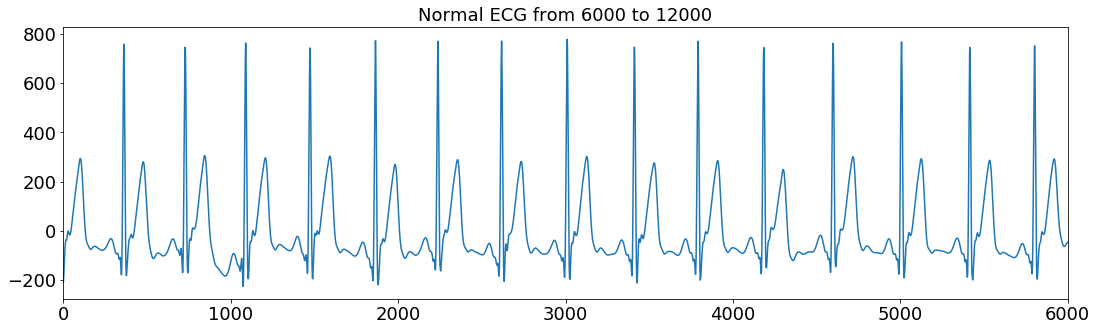

In [13]:
plot(ecg_normal[6000:12000], (18, 5), 'Normal ECG from 6000 to 12000')

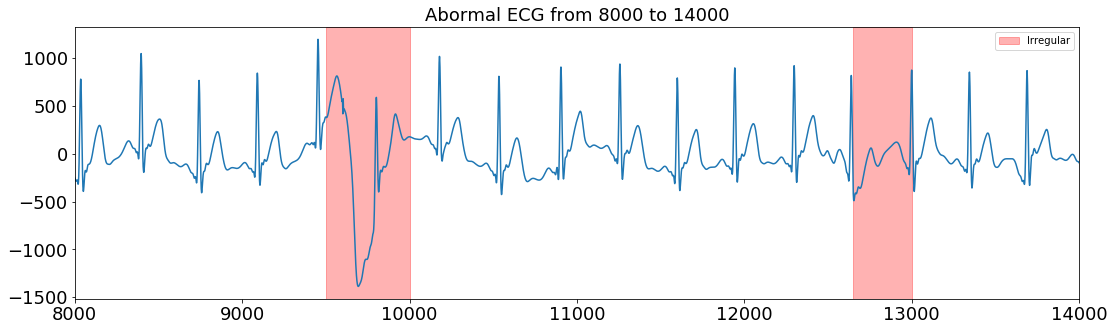

In [14]:
plt.figure(figsize=(18, 5));
plt.plot(ecg_abnormal['ecg'][8000:14000]);
plt.title('Abormal ECG from 8000 to 14000', fontsize=18);
plt.xlim(8000, 14000);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

plt.axvspan(9500, 10000, color="red", alpha=0.3, label='Irregular');
plt.axvspan(12650, 13000, color="red", alpha=0.3);
plt.legend();

### Create more test data

Create an abnormal data from other normal data manually.

In [15]:
normal_for_abnormal = pd.read_csv('../data/normal_for_abnormal.csv', header=None, names=['ecg'])

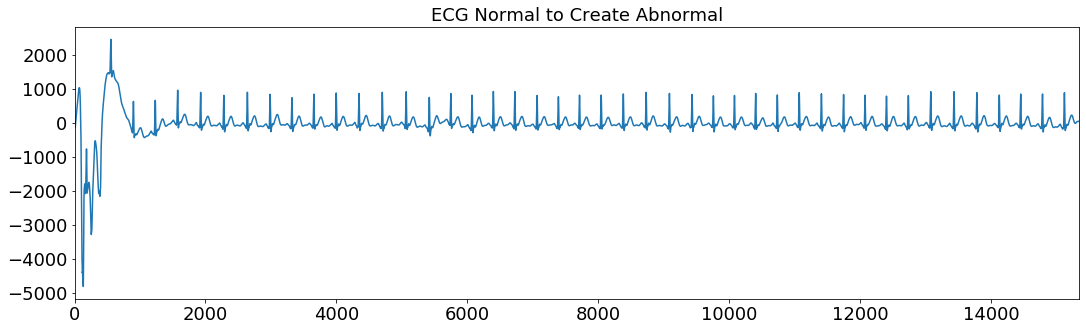

In [16]:
plot(normal_for_abnormal, (18, 5), 'ECG Normal to Create Abnormal')

The data has a corruption on the first 1000 data points. Those data is cut out and displayed again.

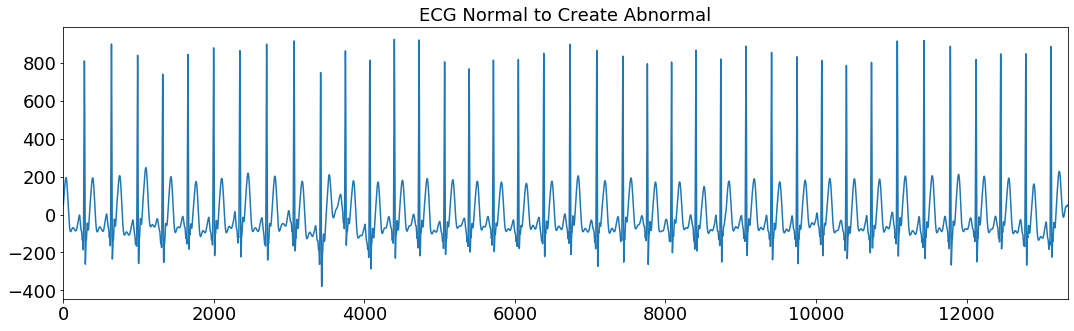

In [17]:
plot(normal_for_abnormal[2000:], (18, 5), 'ECG Normal to Create Abnormal')

The data looks regular from 7000 to 13000. The interval is extracted and an abnormal pattern is created.

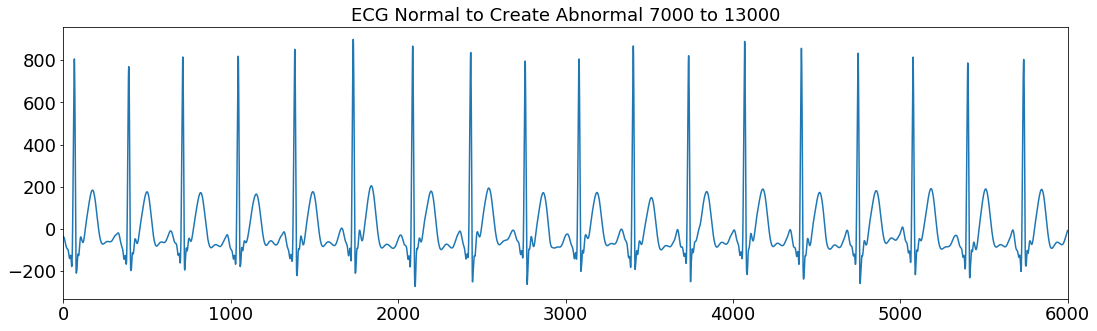

In [18]:
plot(normal_for_abnormal[7000:13000], (18, 5), 'ECG Normal to Create Abnormal 7000 to 13000')

An abnormal pattern is created manually from 9090 to 9450.

In [19]:
normal_for_abnormal[9090:9450] = [[random.uniform(-5, 5)] for _ in range(450-90)]

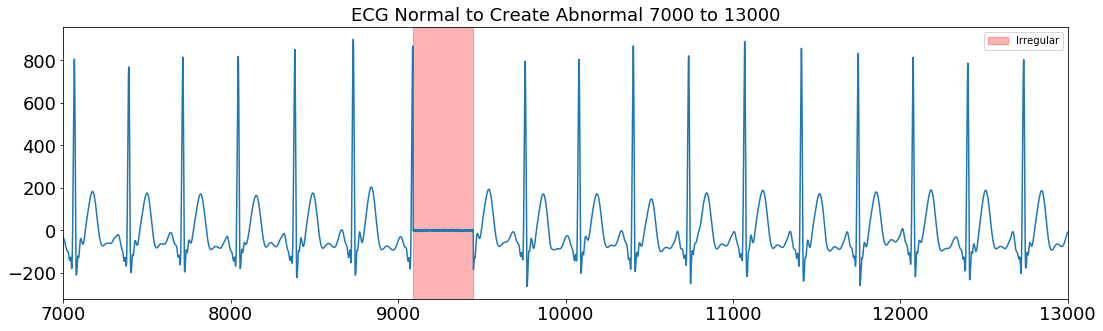

In [22]:
plt.figure(figsize=(18, 5));
plt.plot(normal_for_abnormal[7000:13000]);
plt.title('ECG Normal to Create Abnormal 7000 to 13000', fontsize=18);
plt.xlim(7000, 13000);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

plt.axvspan(9090, 9450, color="red", alpha=0.3, label='Irregular');
plt.legend();

### Save data

In [ ]:
train = ecg_normal['ecg'][6000:12000]

In [ ]:
train.to_csv('../data/train.csv', index=False)

In [ ]:
test_01 = ecg_abnormal_1[8000:14000]

In [ ]:
test_01.to_csv('../data/test_01.csv', index=False)

In [77]:
test_02 = normal_for_abnormal[7000:13000]

In [78]:
test_02.to_csv('../data/test_02.csv', index=False)

The Normal ECG has a regular pattern whereas the abnormal ECG has irregular patterns. The abnormal data contains irregular patterns at the green area. And one more data was created manually for testing. The red areas above graph are defined the anomalous patterns which is needed to detect. Therefore, models that will be created need to detect those anomalous patterns.